
To create a plot with tree depth on the x-axis and mean absolute error (MAE) on the y-axis for both the training and validation datasets, you'll need to train the decision tree regressor with different tree depths and calculate the MAE at each depth. Here's how you can modify your code to create such a plot:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# save filepath to variable for easier access
melbourne_file_path = './input/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)


In [15]:
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

260981.82633957392


split data into training and validation data

In [16]:
# Create lists to store the MAE values for training and validation datasets
train_mae = []
val_mae = []

We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

In [17]:
# Create a range of tree depths to explore
max_depths = range(1, 21)  # Adjust the range as needed

for depth in max_depths:
    # Define and fit the model for the given tree depth
    melbourne_model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    melbourne_model.fit(train_X, train_y)

    # Get predicted prices on both training and validation data
    train_predictions = melbourne_model.predict(train_X)
    val_predictions = melbourne_model.predict(val_X)

    # Calculate and store the MAE for training and validation datasets
    train_mae.append(mean_absolute_error(train_y, train_predictions))
    val_mae.append(mean_absolute_error(val_y, val_predictions))

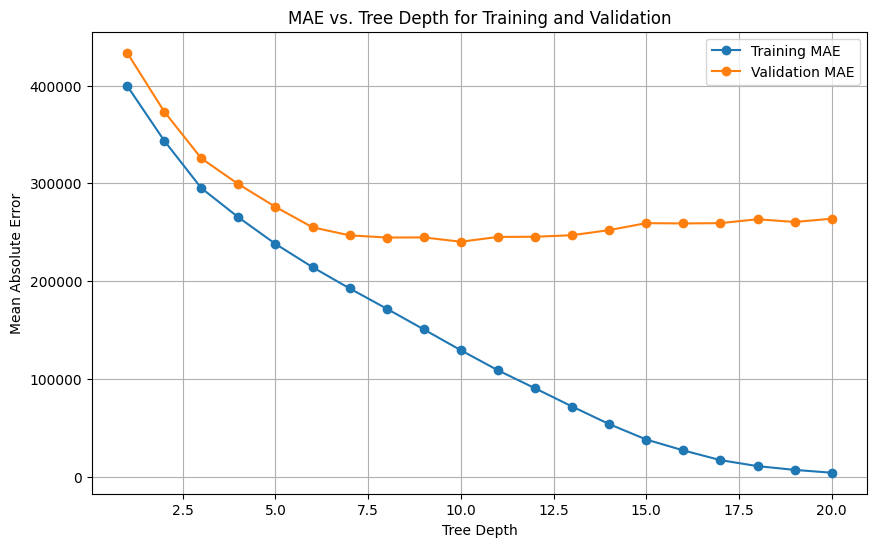

In [18]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_mae, label='Training MAE', marker='o')
plt.plot(max_depths, val_mae, label='Validation MAE', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs. Tree Depth for Training and Validation')
plt.legend()
plt.grid(True)
plt.show()